<a href="https://colab.research.google.com/github/pratikwatwani/San-Francisco-Drug-Usage/blob/master/Data%20Cleaning/San%20Francisco%20Police%20Complains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/PUI Project San Francisco Drug Usage/Data/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,"(37.7196874952717, -122.476327815126)",11030874275000
1,90316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,"(37.7812707434494, -122.411339562557)",9031691463010
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,"(37.7626702770872, -122.435187699349)",13013231115200
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,"(37.7649178909424, -122.421886357981)",8005283365016
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,37.751693,"(37.7516932889916, -122.413935404044)",7053577015200


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215024 entries, 0 to 2215023
Data columns (total 13 columns):
IncidntNum    int64
Category      object
Descript      object
DayOfWeek     object
Date          object
Time          object
PdDistrict    object
Resolution    object
Address       object
X             float64
Y             float64
Location      object
PdId          int64
dtypes: float64(2), int64(2), object(9)
memory usage: 219.7+ MB


In [0]:
df.set_index(keys = 'IncidntNum', inplace = True, drop = True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215024 entries, 110308742 to 100778387
Data columns (total 12 columns):
Category      object
Descript      object
DayOfWeek     object
Date          object
Time          object
PdDistrict    object
Resolution    object
Address       object
X             float64
Y             float64
Location      object
PdId          int64
dtypes: float64(2), int64(1), object(9)
memory usage: 219.7+ MB


In [0]:
df.Category.unique()

array(['MISSING PERSON', 'WARRANTS', 'SECONDARY CODES', 'OTHER OFFENSES',
       'LARCENY/THEFT', 'FORGERY/COUNTERFEITING', 'ASSAULT',
       'DRUG/NARCOTIC', 'NON-CRIMINAL', 'BURGLARY', 'VANDALISM',
       'DRUNKENNESS', 'ROBBERY', 'VEHICLE THEFT', 'KIDNAPPING', 'FRAUD',
       'PROSTITUTION', 'DISORDERLY CONDUCT', 'STOLEN PROPERTY',
       'RECOVERED VEHICLE', 'LIQUOR LAWS', 'WEAPON LAWS',
       'SUSPICIOUS OCC', 'TRESPASS', 'EMBEZZLEMENT', 'RUNAWAY',
       'DRIVING UNDER THE INFLUENCE', 'SEX OFFENSES, FORCIBLE',
       'BAD CHECKS', 'SEX OFFENSES, NON FORCIBLE', 'SUICIDE',
       'FAMILY OFFENSES', 'ARSON', 'LOITERING', 'GAMBLING', 'BRIBERY',
       'EXTORTION', 'PORNOGRAPHY/OBSCENE MAT', 'TREA'], dtype=object)

In [0]:
df.Category.str.startswith('DRUG')

IncidntNum
110308742    False
90316914     False
130132311    False
80052833     False
70535770     False
             ...  
61082136     False
130355795    False
30118617     False
40194839     False
100778387    False
Name: Category, Length: 2215024, dtype: bool

In [0]:
df_drug = df[df.Category.str.startswith('DRUG')]

In [0]:
print("New data set is {}% of original data set".format(np.round((df_drug.shape[0]/df.shape[0])*100)))

New data set is 5.0% of original data set


In [0]:
df_drug.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
IncidntNum,,,,,,,,,,,,
60009826,DRUG/NARCOTIC,POSSESSION OF BASE/ROCK COCAINE FOR SALE,Tuesday,01/03/2006,16:24,MISSION,JUVENILE BOOKED,24TH ST / MISSION ST,-122.418448,37.752239,"(37.7522391652625, -122.418448186101)",6000982616623
70203579,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Sunday,02/25/2007,17:54,MISSION,NONE,0 Block of HOFF ST,-122.420436,37.764174,"(37.7641743318753, -122.420436287467)",7020357916010
80171568,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Sunday,02/17/2008,18:35,TENDERLOIN,"ARREST, BOOKED",HYDE ST / GOLDEN GATE AV,-122.415508,37.781654,"(37.7816542806076, -122.415508242782)",8017156816010
90920957,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Monday,09/07/2009,14:40,TENDERLOIN,"ARREST, BOOKED",TURK ST / JONES ST,-122.412414,37.783004,"(37.7830037964534, -122.412414263581)",9092095716710
100460948,DRUG/NARCOTIC,POSSESSION OF MARIJUANA FOR SALES,Monday,05/17/2010,14:43,TARAVAL,UNFOUNDED,1600 Block of 47TH AV,-122.506739,37.755694,"(37.7556938548753, -122.506738808355)",10046094816030


In [0]:
df_drug.drop('Category', axis = 1, inplace = True)
df_drug.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
IncidntNum,,,,,,,,,,,
60009826,POSSESSION OF BASE/ROCK COCAINE FOR SALE,Tuesday,01/03/2006,16:24,MISSION,JUVENILE BOOKED,24TH ST / MISSION ST,-122.418448,37.752239,"(37.7522391652625, -122.418448186101)",6000982616623
70203579,POSSESSION OF MARIJUANA,Sunday,02/25/2007,17:54,MISSION,NONE,0 Block of HOFF ST,-122.420436,37.764174,"(37.7641743318753, -122.420436287467)",7020357916010
80171568,POSSESSION OF MARIJUANA,Sunday,02/17/2008,18:35,TENDERLOIN,"ARREST, BOOKED",HYDE ST / GOLDEN GATE AV,-122.415508,37.781654,"(37.7816542806076, -122.415508242782)",8017156816010
90920957,POSSESSION OF NARCOTICS PARAPHERNALIA,Monday,09/07/2009,14:40,TENDERLOIN,"ARREST, BOOKED",TURK ST / JONES ST,-122.412414,37.783004,"(37.7830037964534, -122.412414263581)",9092095716710
100460948,POSSESSION OF MARIJUANA FOR SALES,Monday,05/17/2010,14:43,TARAVAL,UNFOUNDED,1600 Block of 47TH AV,-122.506739,37.755694,"(37.7556938548753, -122.506738808355)",10046094816030


In [0]:
df_drug.Date = pd.to_datetime(df_drug.Date, errors = 'coerce')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
df_drug.Time = pd.to_datetime(df_drug['Time'], format='%H:%M').dt.time

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119628 entries, 60009826 to 71003081
Data columns (total 11 columns):
Descript      119628 non-null object
DayOfWeek     119628 non-null object
Date          119628 non-null datetime64[ns]
Time          119628 non-null object
PdDistrict    119628 non-null object
Resolution    119628 non-null object
Address       119628 non-null object
X             119628 non-null float64
Y             119628 non-null float64
Location      119628 non-null object
PdId          119628 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 11.0+ MB


In [0]:
df_drug.index.rename('incident_num', inplace = True)

In [0]:
df_drug.head()

,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
incident_num,,,,,,,,,,,
60009826,POSSESSION OF BASE/ROCK COCAINE FOR SALE,Tuesday,2006-01-03,16:24:00,MISSION,JUVENILE BOOKED,24TH ST / MISSION ST,-122.418448,37.752239,"(37.7522391652625, -122.418448186101)",6000982616623
70203579,POSSESSION OF MARIJUANA,Sunday,2007-02-25,17:54:00,MISSION,NONE,0 Block of HOFF ST,-122.420436,37.764174,"(37.7641743318753, -122.420436287467)",7020357916010
80171568,POSSESSION OF MARIJUANA,Sunday,2008-02-17,18:35:00,TENDERLOIN,"ARREST, BOOKED",HYDE ST / GOLDEN GATE AV,-122.415508,37.781654,"(37.7816542806076, -122.415508242782)",8017156816010
90920957,POSSESSION OF NARCOTICS PARAPHERNALIA,Monday,2009-09-07,14:40:00,TENDERLOIN,"ARREST, BOOKED",TURK ST / JONES ST,-122.412414,37.783004,"(37.7830037964534, -122.412414263581)",9092095716710
100460948,POSSESSION OF MARIJUANA FOR SALES,Monday,2010-05-17,14:43:00,TARAVAL,UNFOUNDED,1600 Block of 47TH AV,-122.506739,37.755694,"(37.7556938548753, -122.506738808355)",10046094816030


In [0]:
df_drug.columns = df_drug.columns.str.lower()
df_drug.head()

,descript,dayofweek,date,time,pddistrict,resolution,address,x,y,location,pdid
incident_num,,,,,,,,,,,
60009826,POSSESSION OF BASE/ROCK COCAINE FOR SALE,Tuesday,2006-01-03,16:24:00,MISSION,JUVENILE BOOKED,24TH ST / MISSION ST,-122.418448,37.752239,"(37.7522391652625, -122.418448186101)",6000982616623
70203579,POSSESSION OF MARIJUANA,Sunday,2007-02-25,17:54:00,MISSION,NONE,0 Block of HOFF ST,-122.420436,37.764174,"(37.7641743318753, -122.420436287467)",7020357916010
80171568,POSSESSION OF MARIJUANA,Sunday,2008-02-17,18:35:00,TENDERLOIN,"ARREST, BOOKED",HYDE ST / GOLDEN GATE AV,-122.415508,37.781654,"(37.7816542806076, -122.415508242782)",8017156816010
90920957,POSSESSION OF NARCOTICS PARAPHERNALIA,Monday,2009-09-07,14:40:00,TENDERLOIN,"ARREST, BOOKED",TURK ST / JONES ST,-122.412414,37.783004,"(37.7830037964534, -122.412414263581)",9092095716710
100460948,POSSESSION OF MARIJUANA FOR SALES,Monday,2010-05-17,14:43:00,TARAVAL,UNFOUNDED,1600 Block of 47TH AV,-122.506739,37.755694,"(37.7556938548753, -122.506738808355)",10046094816030


In [0]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119628 entries, 60009826 to 71003081
Data columns (total 11 columns):
descript      119628 non-null object
dayofweek     119628 non-null object
date          119628 non-null datetime64[ns]
time          119628 non-null object
pddistrict    119628 non-null object
resolution    119628 non-null object
address       119628 non-null object
x             119628 non-null float64
y             119628 non-null float64
location      119628 non-null object
pdid          119628 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 11.0+ MB


In [0]:
ls = ['descript','dayofweek','pddistrict','resolution','address']
for x in ls:
  df_drug[x] = df_drug[x].str.lower()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
df_drug.head()

,descript,dayofweek,date,time,pddistrict,resolution,address,x,y,location,pdid
incident_num,,,,,,,,,,,
60009826,possession of base/rock cocaine for sale,tuesday,2006-01-03,16:24:00,mission,juvenile booked,24th st / mission st,-122.418448,37.752239,"(37.7522391652625, -122.418448186101)",6000982616623
70203579,possession of marijuana,sunday,2007-02-25,17:54:00,mission,none,0 block of hoff st,-122.420436,37.764174,"(37.7641743318753, -122.420436287467)",7020357916010
80171568,possession of marijuana,sunday,2008-02-17,18:35:00,tenderloin,"arrest, booked",hyde st / golden gate av,-122.415508,37.781654,"(37.7816542806076, -122.415508242782)",8017156816010
90920957,possession of narcotics paraphernalia,monday,2009-09-07,14:40:00,tenderloin,"arrest, booked",turk st / jones st,-122.412414,37.783004,"(37.7830037964534, -122.412414263581)",9092095716710
100460948,possession of marijuana for sales,monday,2010-05-17,14:43:00,taraval,unfounded,1600 block of 47th av,-122.506739,37.755694,"(37.7556938548753, -122.506738808355)",10046094816030


In [0]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119628 entries, 60009826 to 71003081
Data columns (total 11 columns):
descript      119628 non-null object
dayofweek     119628 non-null object
date          119628 non-null datetime64[ns]
time          119628 non-null object
pddistrict    119628 non-null object
resolution    119628 non-null object
address       119628 non-null object
x             119628 non-null float64
y             119628 non-null float64
location      119628 non-null object
pdid          119628 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 11.0+ MB


In [0]:
cols = ['dayofweek','date','time','pddistrict','resolution']

<Figure size 2160x1440 with 0 Axes>

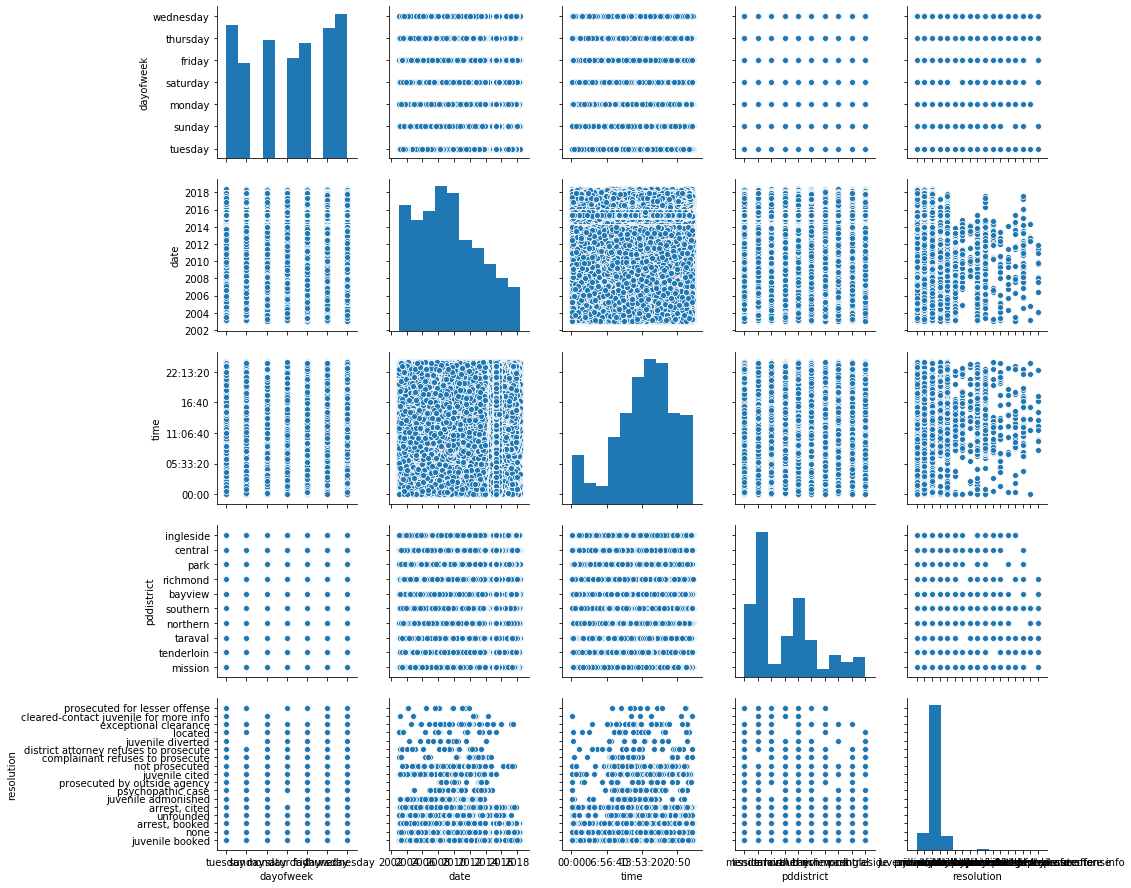

In [0]:
pd.plotting.register_matplotlib_converters()
plt.figure(figsize = (30,20))
sns.pairplot(df_drug, vars=df_drug.loc[:,cols])
plt.show()

In [0]:
#df_drug.to_csv('/content/drive/My Drive/PUI Project San Francisco Drug Usage/Data/cleanedPolice.csv')